In [2]:
import sys
sys.path.insert(0, '../')
from util import util
import numpy as np
import scipy.stats as st

import matplotlib.pyplot as plt

from scipy.optimize import minimize
from scipy.stats.mstats import gmean
import seaborn as sns
import pandas as pd
from statsmodels.distributions.empirical_distribution import ECDF

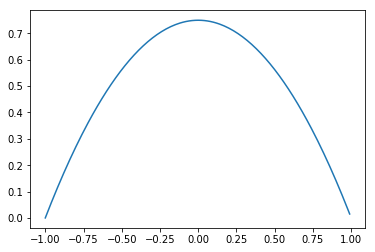

In [3]:
# plot the pdf within the range
x = np.arange (-1, 1, 0.01)

Y1 = st.beta(a = 2,b=2,loc=-1,scale=2)
z = Y1.pdf(x)
plt.plot(x,z)

In [4]:
def sampleSpacings(x):
    #calculates the sample spacings of X
    D=[xi-x[i] for i,xi in enumerate(x[1:])]
    return np.array(D)

def maximum_spacing(parameters,samples):
    # sort the samples
    orderedSample=np.sort(samples)
    
    # obtain the cdf of samples
    sample_cdf = st.beta.cdf(orderedSample,parameters[0],
                          parameters[1],parameters[2],parameters[3])
    # get the spacings
    spacings = sampleSpacings(sample_cdf)
    
    # we maximise (min) the (negative) log of geometric mean of spacing
    return -np.log(gmean(spacings))

In [5]:
from scipy.stats import kstest
def compute_kstest(parameters,samples):
    test = kstest(samples,'beta',args=parameters)
    return test[0]

def ecdf(x,i=0):
    # normalize X to sum to 1
    #x = x / np.sum(x)
    #ys = np.arange(1, len(x)+1+i)/float(len(x)+i)
    ys = ECDF(x).y
    return ys

# my own implementation of the ks test statistic
# we sort the samples, 
# compute the cdf of those samples for a given beta
# compute  the empirical cdf
# take the maximum of the absolute difference of beta cdf and empirical cdf
def test_compute_kstest(parameters,samples,support=(None,None)):
    samples = np.sort(samples)
    if support[0] is not None:
        beta_cdf = st.beta.cdf(samples, parameters[0], parameters[1], 
                       loc=support[0], scale=support[1])
    else:
        beta_cdf = st.beta.cdf(samples, parameters[0], parameters[1], 
                       loc=parameters[2], scale=parameters[3])
    ecdf_result = ecdf(samples)
    ks_test = np.max(np.concatenate((np.abs(beta_cdf-ecdf_result[:-1]),
                                     np.abs(beta_cdf-ecdf_result[1:]))))
    #ks_test = np.max(np.abs(ecdf_result[:-1]-beta_cdf))
    #test = kstest(samples,'beta',args=parameters)
    return ks_test

In [6]:
S = Y1.rvs(20)
params = st.beta.fit(S)
#params = [2,2,-1,2]
a,b,loc,scale = minimize(test_compute_kstest,params,args=(S),
                        bounds=((1,None),(1,None),(None,None),
                               (None,None))).x
print(test_compute_kstest([a,b,loc,scale],S))
print(compute_kstest([a,b,loc,scale],S))

0.09105195189597015
0.09105195189597015


We plot the CDF of the fitted beta using ks and mse and empirical distribution

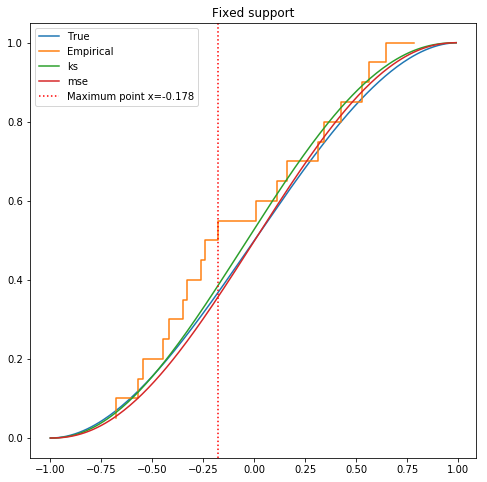

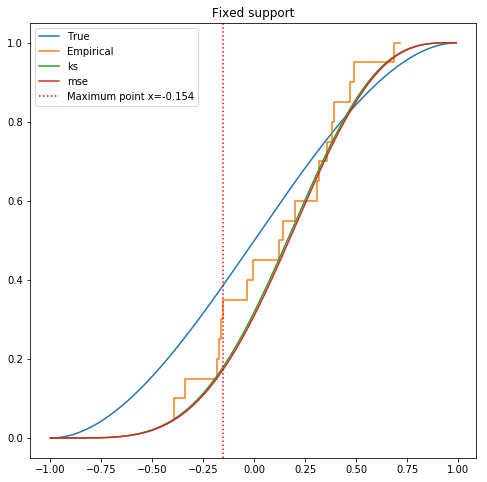

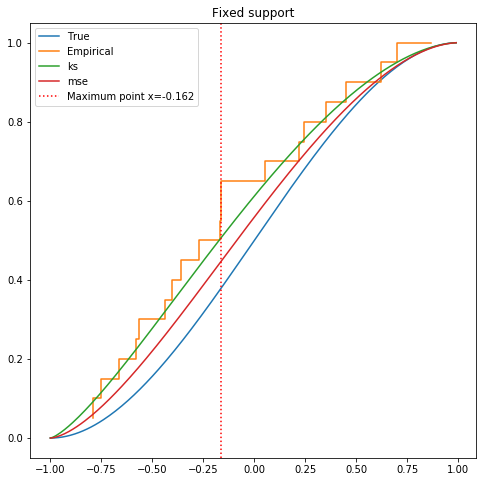

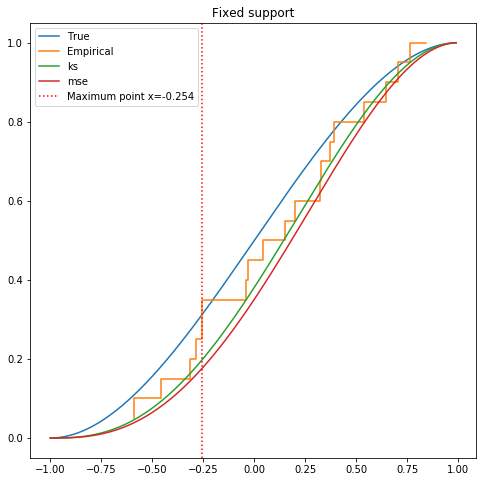

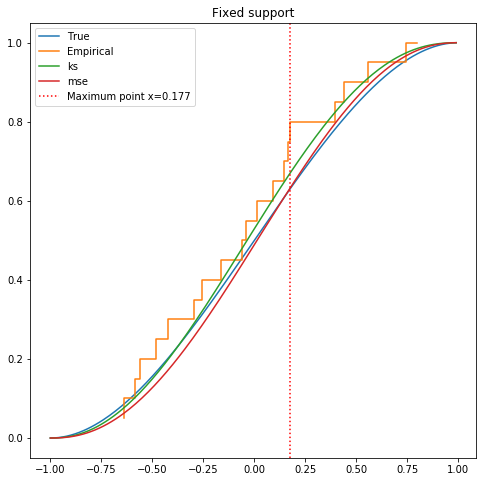

In [8]:
for i in range(5):
    S = Y1.rvs(20)
    plt.figure(figsize=(8,8))
    z = Y1.cdf(x)
    S = np.sort(S)
    empirical_cdf = ecdf(S)
    params = st.beta.fit(S,floc=-1,fscale=2)
    a,b,loc,scale = minimize(test_compute_kstest,params,args=(S),
                        bounds=((1,None),(1,None),(-1,-1),
                               (2,2))).x
    fitted_cdf = st.beta.cdf(S,a,b,loc,scale)
    mse_cdf = st.beta.cdf(S,params[0],params[1],params[2],params[3])
    temp = np.max(np.abs(fitted_cdf-empirical_cdf[:-1]))
    temp2 = np.max(np.abs(fitted_cdf-empirical_cdf[1:]))
    final =  np.argmax(np.abs(fitted_cdf-empirical_cdf[1:]))
    if temp > temp2:
        final = np.argmax(np.abs(fitted_cdf-empirical_cdf[1:]))
    plt.plot(x,z,label='True')
    plt.step(S,empirical_cdf[1:],label='Empirical')
    #plt.step(S,empirical_cdf[:-1],label='Empirical 2')
    plt.plot(x,st.beta.cdf(x,a,b,loc,scale),label="ks")
    plt.plot(x,st.beta.cdf(x,params[0],params[1],params[2],params[3]),label="mse")
    plt.axvline(S[final],linestyle=':',label="Maximum point x={:.3f}".format(S[final]),c='red')
    #plt.axvline(S[simple],linestyle=':',label="Maximum point x={:.3f}".format(S[simple]),c='black')
    plt.title("Fixed support")
    plt.legend()

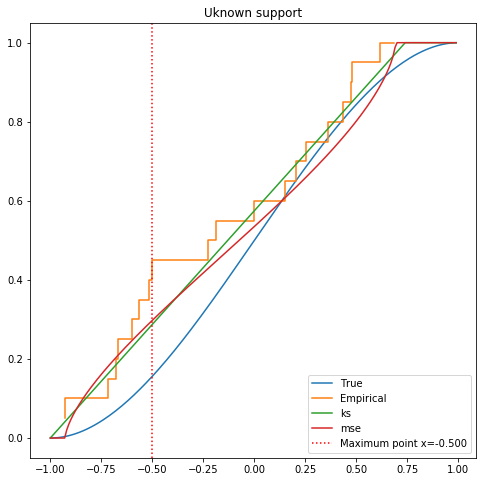

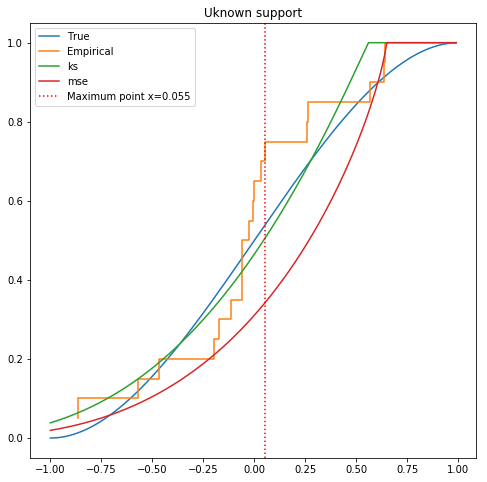

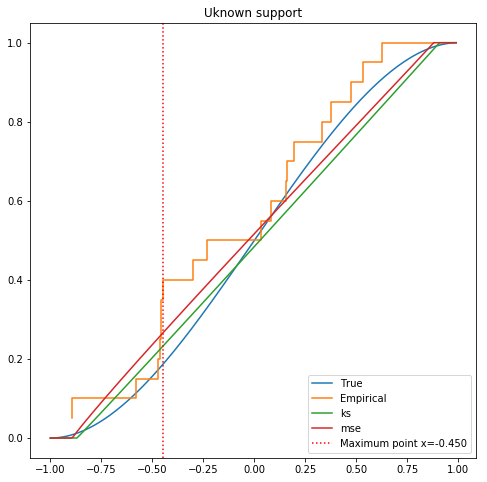

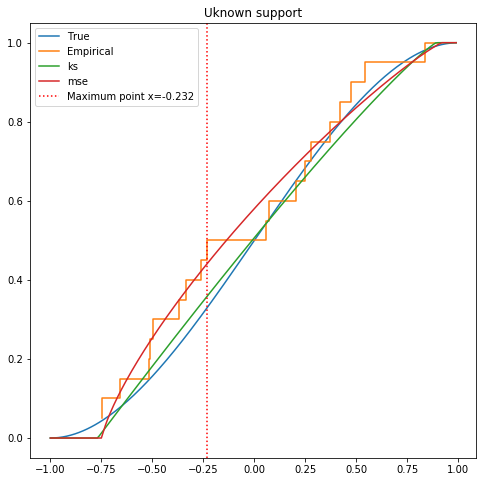

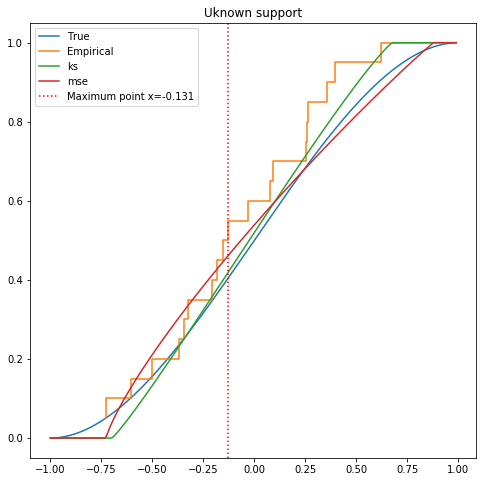

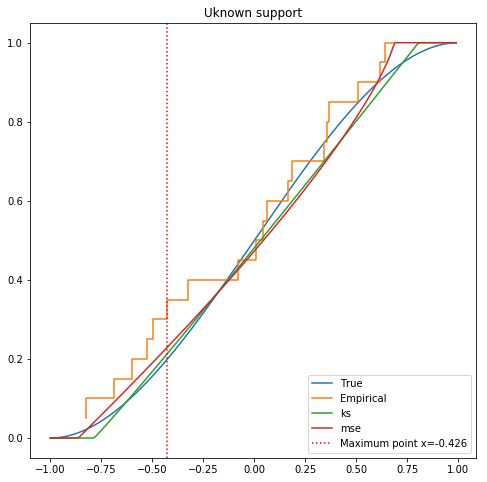

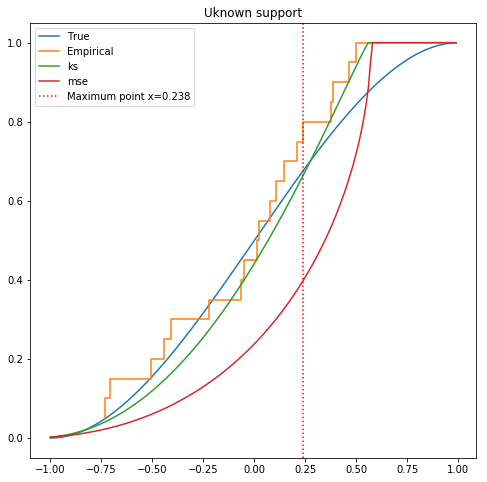

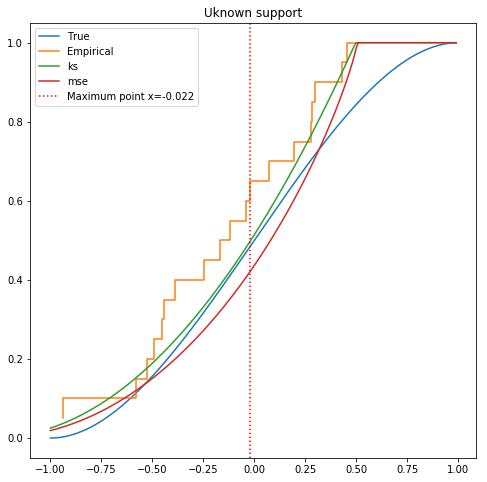

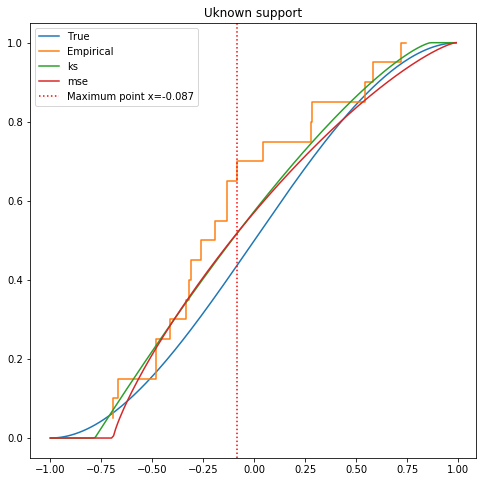

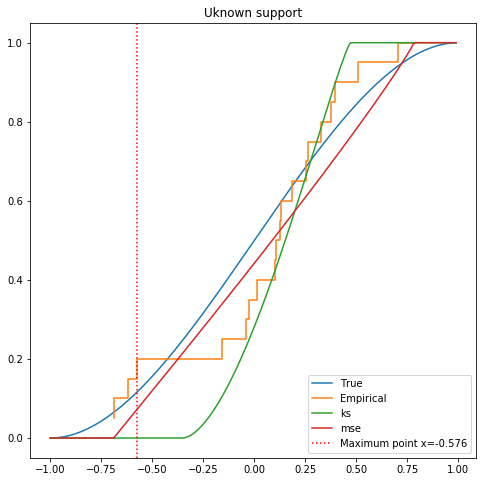

In [12]:
for i in range(10):
    S = Y1.rvs(20)
    plt.figure(figsize=(8,8))
    z = Y1.cdf(x)
    S = np.sort(S)
    empirical_cdf = ecdf(S)
    params = st.beta.fit(S)
    a,b,loc,scale = minimize(test_compute_kstest,params,args=(S),
                        bounds=((1,None),(1,None),(None,None),
                               (None,None))).x
    fitted_cdf = st.beta.cdf(S,a,b,loc,scale)
    mse_cdf = st.beta.cdf(S,params[0],params[1],params[2],params[3])
    temp = np.max(np.abs(fitted_cdf-empirical_cdf[:-1]))
    temp2 = np.max(np.abs(fitted_cdf-empirical_cdf[1:]))
    final =  np.argmax(np.abs(fitted_cdf-empirical_cdf[1:]))
    if temp > temp2:
        final = np.argmax(np.abs(fitted_cdf-empirical_cdf[1:]))
    plt.plot(x,z,label='True')
    plt.step(S,empirical_cdf[1:],label='Empirical')
    #plt.step(S,empirical_cdf[:-1],label='Empirical 2')
    plt.plot(x,st.beta.cdf(x,a,b,loc,scale),label="ks")
    plt.plot(x,st.beta.cdf(x,params[0],params[1],params[2],params[3]),label="mse")
    plt.axvline(S[final],linestyle=':',label="Maximum point x={:.3f}".format(S[final]),c='red')
    #plt.axvline(S[simple],linestyle=':',label="Maximum point x={:.3f}".format(S[simple]),c='black')
    plt.title("Uknown support")
    plt.legend()

In [29]:
results = []
true_results = []
mse_results = []
for i in range(500):
    S = Y1.rvs(20)
    S = np.sort(S)
    params = st.beta.fit(S)
    a,b,loc,scale = minimize(test_compute_kstest,params,args=(S),
                        bounds=((1,None),(1,None),(None,None),
                               (None,None))).x
    empirical_cdf = ecdf(S)
    
    fitted_cdf = st.beta.cdf(S,a,b,loc,scale)
    true_cdf = Y1.cdf(S)
    mse_cdf = st.beta.cdf(S,params[0],params[1],params[2],params[3])
    temp = np.max(np.abs(fitted_cdf-empirical_cdf[:-1]))
    temp2 = np.max(np.abs(fitted_cdf-empirical_cdf[1:]))
    if temp > temp2:
        final = np.argmax(np.abs(fitted_cdf-empirical_cdf[1:]))
        final_true = np.argmax(np.abs(true_cdf-empirical_cdf[1:]))
        final_mse = np.argmax(np.abs(mse_cdf-empirical_cdf[1:]))
    else:
        final =  np.argmax(np.abs(fitted_cdf-empirical_cdf[:-1]))
        final_true = np.argmax(np.abs(true_cdf-empirical_cdf[:-1]))
        final_mse = np.argmax(np.abs(mse_cdf-empirical_cdf[:-1]))
    results.append(S[final])
    true_results.append(S[final_true])
    mse_results.append(S[final_mse])

Text(0.5, 1.0, 'Distribution of maximum point MSE')

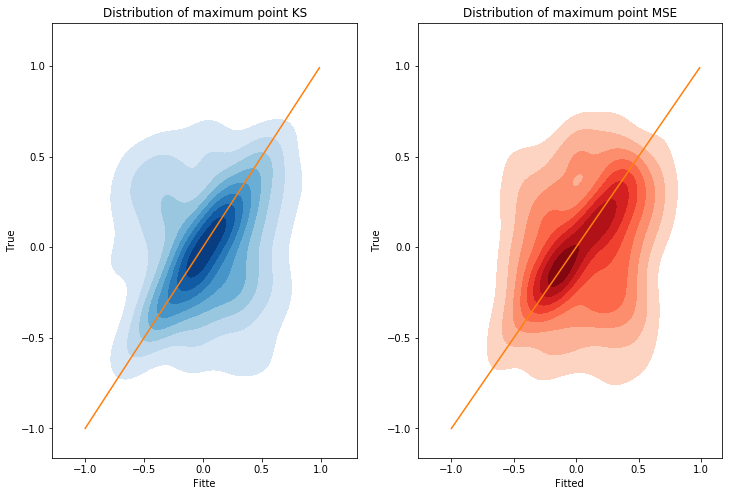

In [30]:
f, axes = plt.subplots(1, 2,figsize=((12,8)))
ax = sns.kdeplot(results,true_results,cmap="Blues",shade=True, shade_lowest=False,ax=axes[0])
ax = sns.lineplot(x,x,ax=axes[0])
ax.set(xlabel='Fitte', ylabel='True')
ax.set_title("Distribution of maximum point KS")
ax = sns.kdeplot(mse_results,true_results,cmap="Reds",shade=True, shade_lowest=False,ax=axes[1])
ax = sns.lineplot(x,x,ax=axes[1])
ax.set(xlabel='Fitted', ylabel='True')
ax.set_title("Distribution of maximum point MSE")
